In [26]:
from __future__ import print_function, division
from builtins import range

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta

In [40]:
NUM_TRIALS = 100000
BANDITS_PROBABILITIES = [0.2, 0.5, 0.75]

In [45]:
class Bandit:
    def __init__(self, p):
        self.p = p
        self.a = 1
        self.b = 1
        self.N = 0

    def pull(self):
        return np.random.random() < self.p

    def sample(self):
        return beta.rvs(self.a, self.b, size=1)

    def update(self, x):
        self.a += x
        self.b += 1 - x
        self.N += 1

In [48]:
def plot(bandits, trial):
    x = np.linspace(0, 1, 200)
    for b in bandits:
        y = beta.pdf(x, b.a, b.b)
        plt.plot(x, y, label=f"real p: {b.p:.4f}, win rate = {b.a - 1}/{b.N}")
    plt.title(f"Bandit distributions after {trial} trials")
    plt.legend()
    plt.show()

def experiment():
    bandits = [Bandit(p) for p in BANDITS_PROBABILITIES]

    sample_points = [5, 10, 20, 50, 100, 200, 500, 1000, 1500, 1999]
    rewards = np.zeros(NUM_TRIALS)
    for i in range(NUM_TRIALS):
        # Thompson sampling
        j = np.argmax([b.sample() for b in bandits])

        if i in sample_points:
            plot(bandits, i)

        x = bandits[j].pull()
        rewards[i] = x
        rewards[i] = x

        bandits[j].update(x)
    print("total reward earned:", rewards.sum())
    print("overall win rate:", rewards.sum() / NUM_TRIALS)
    print("num times selected each bandit:", [b.N for b in bandits])

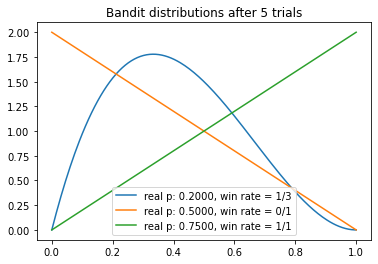

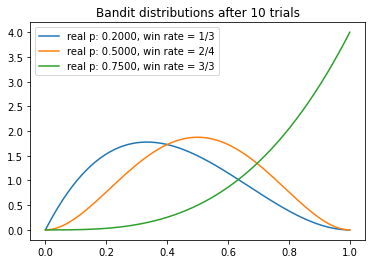

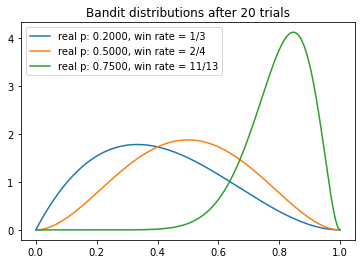

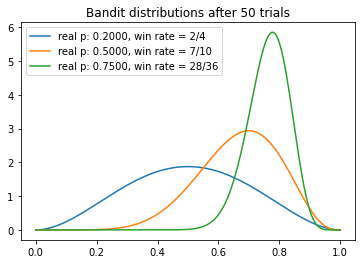

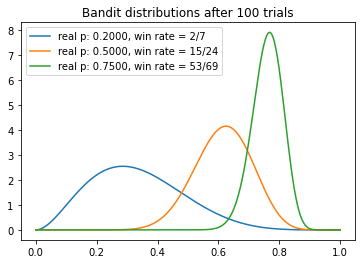

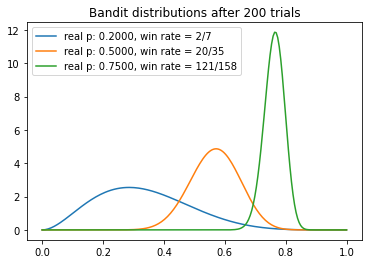

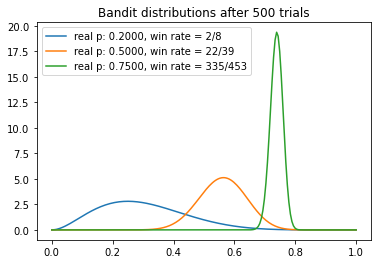

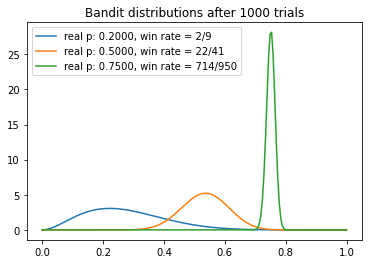

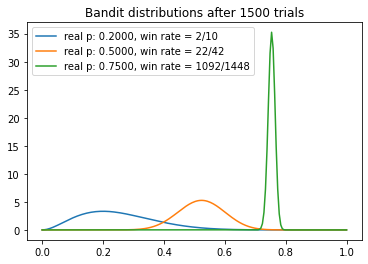

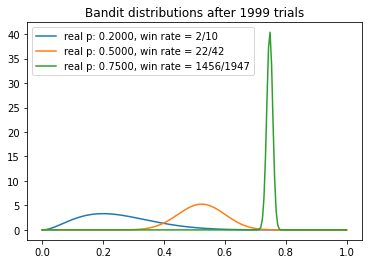

total reward earned: 74840.0
overall win rate: 0.7484
num times selected each bandit: [14, 51, 99935]


In [49]:
experiment()